Source the dataset fish information. 

My hypothesis is how to create a prediction model that can predict the species of a fish. 

Clean data by removing outliers. 

Test the model. If the "test or train models score > 75 than the test is accurate. 

Develop visuals to understand the data that is being processed. 

How could this model be more accurate? 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import copy

In [9]:
data = pd.read_csv('Fish Information.csv')

In [10]:
data.rename(columns= {'Length1':'Body_height', 'Length2':'Total_Length', 'Length3':'Diagonal_Length'}, inplace=True)

In [11]:
data.head()

,Species,Weight,Body_height,Total_Length,Diagonal_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
data.describe()

,Weight,Body_height,Total_Length,Diagonal_Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


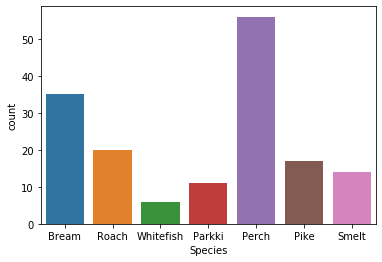

In [13]:
sns.countplot(x='Species',data=data);

In [14]:
names = data['Species'].unique()
columns = data.columns[:]

In [15]:
columns = data.columns[1:]

data_outliers = []
for name in names:
    dfw = data[data['Species']==name]
    for col in columns:    
        Q_min = dfw["Weight"].quantile(0.01)
        Q_max = dfw["Weight"].quantile(0.99)
        idx = (data['Species']==name) & ((data["Weight"] < Q_min) | (data["Weight"] > Q_max))
        data_outliers.append(data[idx])

data_outliers = pd.concat(data_outliers)
data_cleared = data.drop(data_outliers.index.unique())
data_cleared

,Species,Weight,Body_height,Total_Length,Diagonal_Length,Height,Width
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
...,...,...,...,...,...,...,...
153,Smelt,9.8,11.4,12.0,13.2,2.2044,1.1484
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558


In [16]:
data_cleared.describe()

,Weight,Body_height,Total_Length,Diagonal_Length,Height,Width
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,397.717007,26.351701,28.529932,31.340816,9.021893,4.454250
std,342.793455,9.613072,10.301027,11.163945,4.233858,1.646311
min,7.000000,10.000000,10.500000,11.600000,1.728400,1.148400
25%,127.500000,19.350000,21.150000,23.350000,6.031600,3.467700
50%,290.000000,25.400000,27.500000,29.400000,7.786000,4.322500
75%,650.000000,32.700000,35.500000,39.650000,12.406050,5.584500
max,1600.000000,56.000000,60.000000,64.000000,18.754200,8.142000


In [17]:
def display(y, ypred):
    pd.options.display.max_rows = (len(y))
    df = pd.DataFrame ({'Actual': y, 'Predicted': ypred})
    return df

In [18]:
x = data_cleared
y = data_cleared['Weight']
x = x.drop(columns=["Weight"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

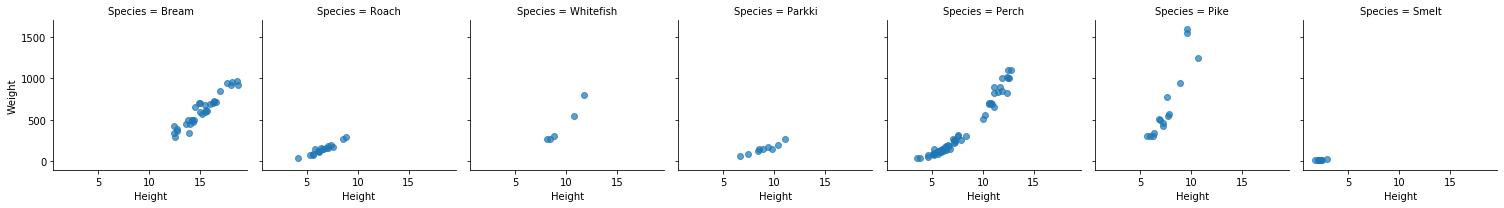

In [19]:
g = sns.FacetGrid(data_cleared, col="Species")
g.map(plt.scatter, "Height", "Weight", alpha=0.7);

In [20]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Body_height      159 non-null    float64
 3   Total_Length     159 non-null    float64
 4   Diagonal_Length  159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


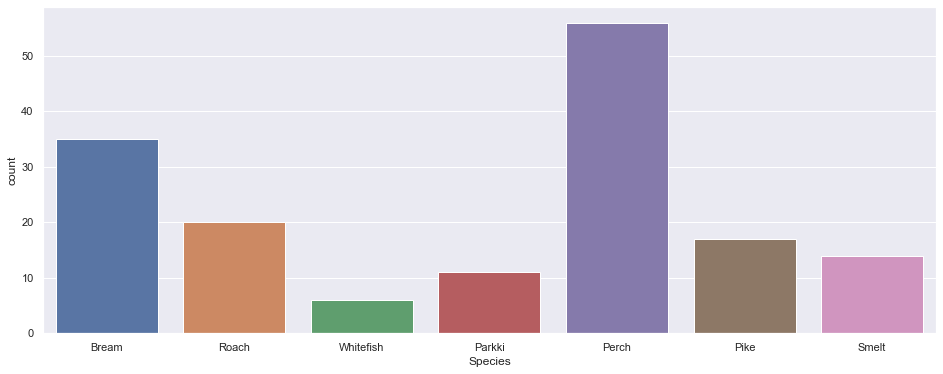

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Species", data=data)

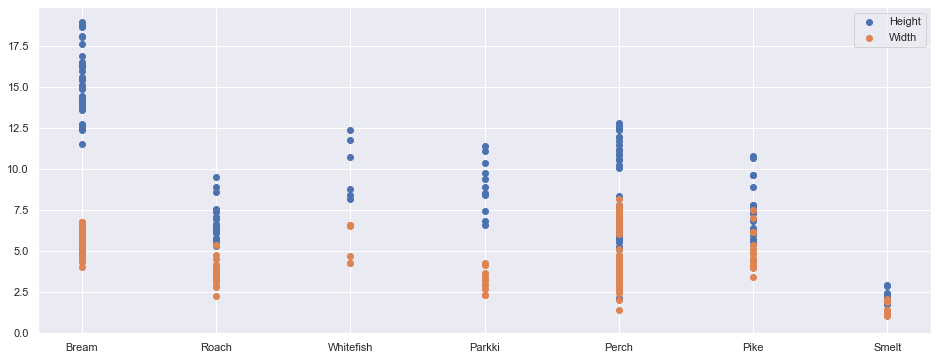

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [22]:
X = data['Species']
y=data['Height']
z=data['Width']

plt.figure(figsize=(16, 6))

plt.scatter(X,y,label='Height')
plt.scatter(X,z,label = 'Width')
plt.legend()
plt.show()
data.Species.unique()

In [23]:
import os
for dirname, _, filenames in os.walk('Fish Information.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [24]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Body_height      159 non-null    float64
 3   Total_Length     159 non-null    float64
 4   Diagonal_Length  159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Species,Weight,Body_height,Total_Length,Diagonal_Length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
X = data.drop(columns = ["Species"])
y = data.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create list with usefull cols
useful_features = ["Weight", "Length1", "Length2", "Length3", "Height", "Width"]

In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model.predict(X_test)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Perch', 'Perch', 'Pike', 'Bream', 'Whitefish', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Smelt', 'Smelt', 'Pike', 'Roach'], dtype=object)

In [28]:
print(model.score(X_train, y_train))
# score of test
print(model.score(X_test, y_test))

0.7795275590551181
0.875
